In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt


In [11]:
vol_img = sitk.ReadImage(r"C:\Users\Audit\Uppsala - Masters Europe\Semester 3\Project in Image analysis - Software\UCAN-PET-CT-image-data-handling-pipeline\Task 2.1\Data\sample3Dimg.nrrd")

file_reader = sitk.ImageFileReader()
file_reader.SetImageIO('NrrdImageIO')
file_reader.SetFileName(r"C:\Users\Audit\Uppsala - Masters Europe\Semester 3\Project in Image analysis - Software\UCAN-PET-CT-image-data-handling-pipeline\Task 2.1\Data\sample3Dimg.nrrd")
file_reader.Execute()

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x0000023A0352CA20> >

(-0.5, 167.5, 167.5, -0.5)

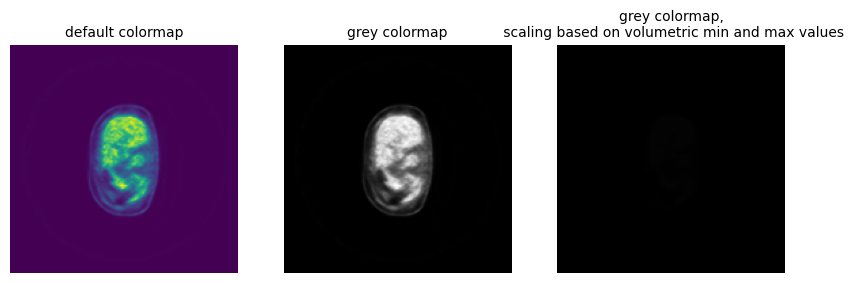

In [19]:
# Display the image slice from the middle of the stack, z axis
# print(vol_img.GetDepth())
z = int(vol_img.GetDepth()/2)
npa_zslice = sitk.GetArrayViewFromImage(vol_img)[z,:,:]
npa = sitk.GetArrayViewFromImage(vol_img)
# Three plots displaying the same data, how do we deal with the high dynamic range?
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,3,1)
plt.imshow(npa_zslice)
plt.title('default colormap', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,2)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r)
plt.title('grey colormap', fontsize=10)
plt.axis('off')

fig.add_subplot(1,3,3)
plt.title('grey colormap,\n scaling based on volumetric min and max values', fontsize=10)
plt.imshow(npa_zslice,cmap=plt.cm.Greys_r, vmin=npa.min(), vmax=npa.max())
plt.axis('off')